<a id=contents></a>

# Exploratory Data Analysis
## Our clean data at a glance


[1. Data Inspection](#insp)

[2. Correllation and visualizing relationships between features](#corr)

[3. How does this affect it? (playing with some barplots and hue](#bar)

[4. EDA 1](#one)

[5. EDA 2](#two)

[6. EDA 3](#three)

[7. Conclusions and ideas going forward](#conc)

In [1]:

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from sklearn.linear_model import LogisticRegression
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import string

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
tokenizer = RegexpTokenizer(r'\b\w{3,}\b')
stop_words = list(set(stopwords.words("english")))
stop_words += list(string.punctuation)

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('clean_data/clean_data.csv', ).drop(columns=['Unnamed: 0'])
df.head()

,Sentence #,Word,POS,Tag
0,1.0,Thousands,NNS,O
1,1.0,of,IN,O
2,1.0,demonstrators,NNS,O
3,1.0,have,VBP,O
4,1.0,marched,VBN,O


<a id=insp ><a/> 

## 1. Explore POS and NE Tags
    
[LINK to table of contents](#contents)

In [3]:
pos_tag_breakdown = df.groupby(by=['POS', 'Tag']).count().sort_values(by='Word', ascending=False)
pos_tag_breakdown

,,Sentence #,Word
POS,Tag,,
NN,O,9171,9171
IN,O,7622,7622
DT,O,6275,6275
.,O,5190,5190
NNS,O,4681,4681
...,...,...,...
DT,I-art,1,1
RBR,B-tim,1,1
JJ,I-eve,1,1


In [4]:
pos_tag_breakdown.Word.quantile(.75)

154.25

In [5]:
# Since there are so many POS and NE categories, we'll only take the combinations that have a frequency above 
# the 75th quantile of 154
pos_tag_trim = pos_tag_breakdown.loc[pos_tag_breakdown.Word>154]
pos_tag_trim.head()

,,Sentence #,Word
POS,Tag,,
NN,O,9171,9171
IN,O,7622,7622
DT,O,6275,6275
.,O,5190,5190
NNS,O,4681,4681


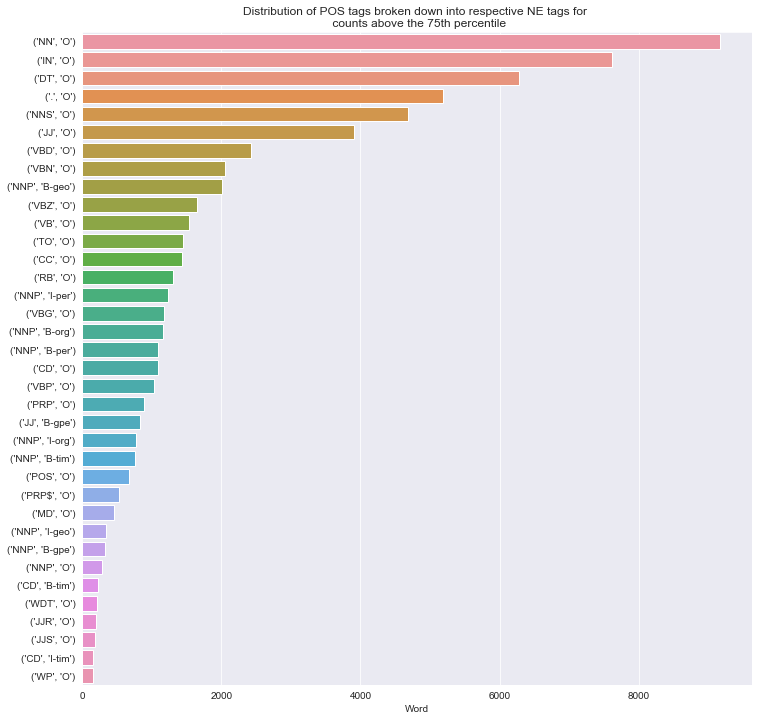

In [6]:
plt.figure(figsize=(12,12))
plt.title('Distribution of POS tags broken down into respective NE tags for \n counts above the 75th percentile')
sns.barplot(y = pos_tag_trim.index, x= pos_tag_trim.Word, data = pos_tag_trim,);

So we can see that, for the most numerically significant groups, the distribution is dominated by 'Other' (i.e. non-Named Entities). The largest group of named entities is the ~2000-odd geographical entities (B-geo). If you're struggling to understand the BIO formatting, know that the B signifies the beginning of an NE sequence (so 'B-geo' would be the *first* word of sequences like 'Europe' and 'South America') whereas I only relates to the words after the first one in an NE sequence (so 'Europe' would not be categorised as 'I-geo', but the second word of 'South America' would). The massive gap between the frequency of B-geo, NNP (2000) and I-geo, NNP (<300) tells us that generally speaking most proper noun geographical entities consist of a single token (like 'Europe', 'Asia', 'Nile').

Now let's visualise what this would look like without any of the non-entities. 

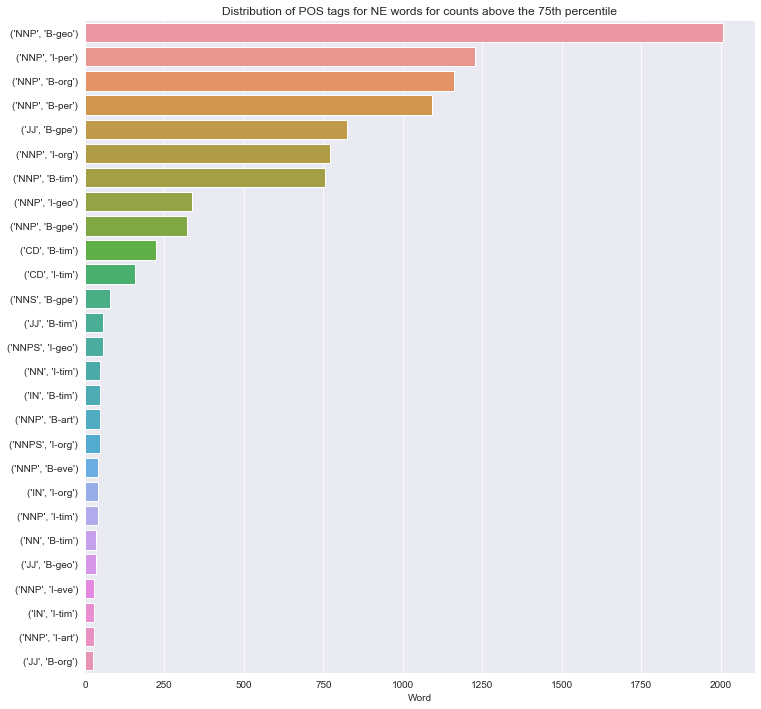

In [7]:
NE_breakdown = df.loc[df.Tag!='O'].groupby(by=['POS', 'Tag']).count().sort_values(by='Word', ascending=False)
NE_breakdown.describe()

NE_breakdown_trim = NE_breakdown.loc[NE_breakdown.Word>NE_breakdown.Word.quantile(.75)]

plt.figure(figsize=(12,12))
plt.title('Distribution of POS tags for NE words for counts above the 75th percentile')
sns.barplot(y = NE_breakdown_trim.index, x= NE_breakdown_trim.Word, data = NE_breakdown_trim,);

Looking at our indexes, we can see that most of our NEs are indeed proper nouns (NNP), spanning multiple POS categories. 

<a id=corr ><a/> 

## 2.  Correllation and visualizing relationships between features
    
[LINK to table of contents](#contents)

<a id=bar ><a/> 

## 3. How does this affect it? (playing with some barplots and hue
   
[LINK to table of contents](#contents)

<a id=one ><a/> 

## 4. EDA 1
    
[LINK to table of contents](#contents)

<a id=two ><a/> 

## 5. EDA 2
    
[LINK to table of contents](#contents)

<a id=three ><a/> 

## 6. EDA 3
    
[LINK to table of contents](#contents)

<a id=conc ><a/> 

## 7. Conclusions and ideas going forward
    
[LINK to table of contents](#contents)